In [ ]:
!pip install jupyterthemes

# Module/package installation 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 
print("Done")

Done


In [ ]:
#Load the dataset
tweets_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Twitter Sentiment Analysis/twitter.csv")

In [ ]:
tweets_df = tweets_df.drop(["id"], axis=1)

In [ ]:
tweets_df

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

# Data Exploration

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


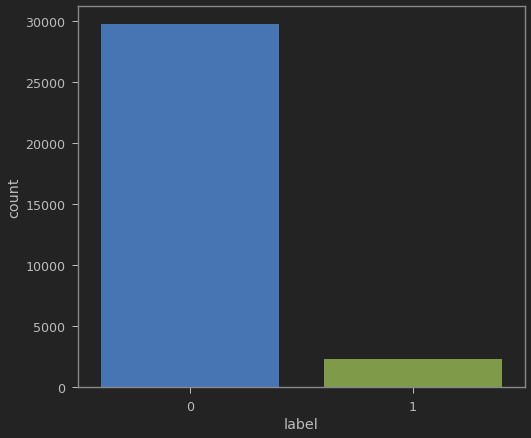

In [ ]:
sns.countplot(tweets_df["label"], label = 'count')

In [ ]:
tweets_df["length"] = tweets_df['tweet'].apply(len)

In [ ]:
tweets_df["length"].describe()

count    31962.000000
mean        84.739628
std         29.455749
min         11.000000
25%         63.000000
50%         88.000000
75%        108.000000
max        274.000000
Name: length, dtype: float64

In [ ]:
tweets_df[tweets_df['length']==84]["tweet"]

43       my mom shares the same bihday as @user   bihda...
220      g o a l s ð repost from @user #propey #ocea...
640      oscar tabarez talks luis suarezâs angry reac...
723       @user another hands &amp; feet complete!! ber...
742      because great things never came from comfo zon...
                               ...                        
31445    .@user on making choices to keep herself   as ...
31448    i'm a gordo. #passpo #florence #firenze #italy...
31509    just 3 keys that are found on your computer to...
31857    traveling happy #family   holidays #car #sunny...
31883    we spent #familytime by doing simple wefie, we...
Name: tweet, Length: 333, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


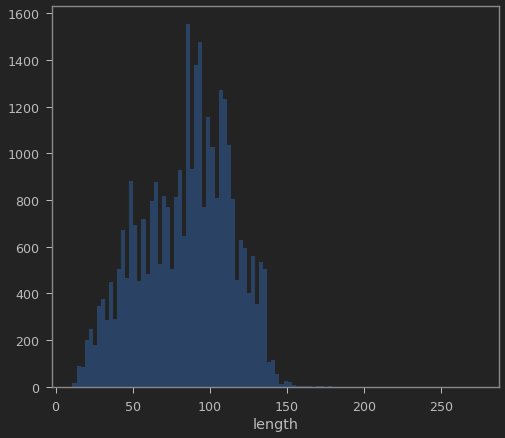

In [ ]:
sns.distplot(tweets_df['length'], bins= 100, kde= False)

In [ ]:
positive = tweets_df[tweets_df['label']==0]
positive

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31956      0  off fishing tomorrow @user carnt wait first ti...      61
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31961      0                   thank you @user for you follow        32

[29720 rows x 3 columns]

In [ ]:
negative = tweets_df[tweets_df['label']==1]
negative


label                                              tweet  length
13         1  @user #cnn calls #michigan middle school 'buil...      74
14         1  no comment!  in #australia   #opkillingbay #se...     101
17         1                             retweet if you agree!       22
23         1    @user @user lumpy says i am a . prove it lumpy.      47
34         1  it's unbelievable that in the 21st century we'...     104
...      ...                                                ...     ...
31934      1  lady banned from kentucky mall. @user  #jcpenn...      59
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...      82
31947      1  @user @user you don't have the balls to hashta...     112
31948      1   makes you ask yourself, who am i? then am i a...      87
31960      1  @user #sikh #temple vandalised in in #calgary,...      67

[2242 rows x 3 columns]

# Plotting Word Cloud

In [ ]:
sentences = tweets_df['tweet'].tolist()

In [ ]:
sentences_as_one_string = " ".join(sentences)

In [ ]:
sentences_as_one_string

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

In [ ]:
!pip install wordcloud

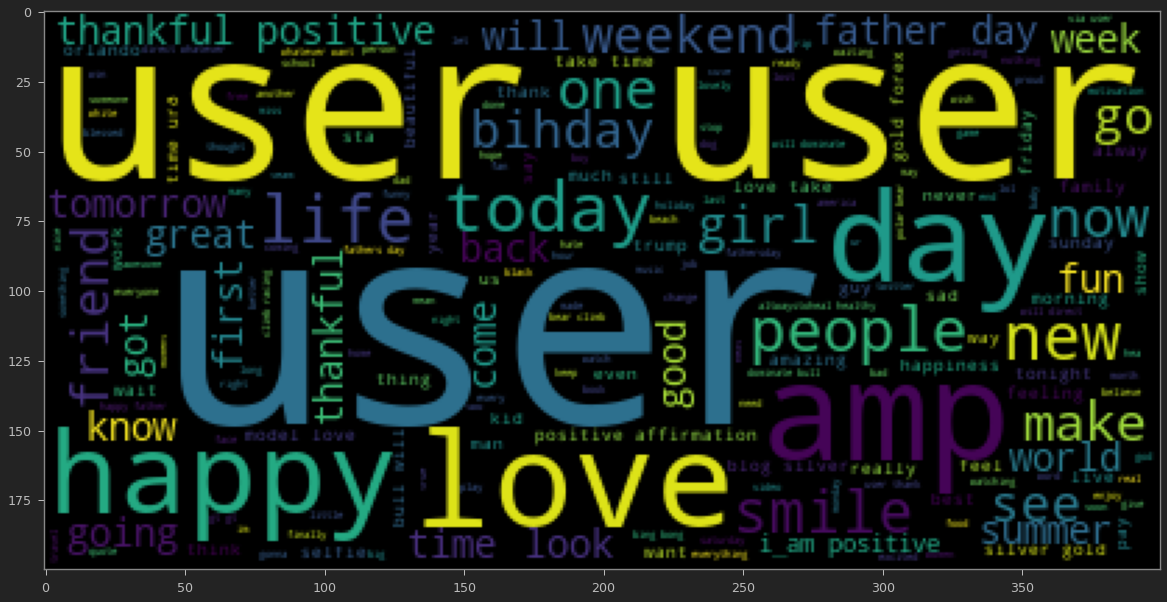

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

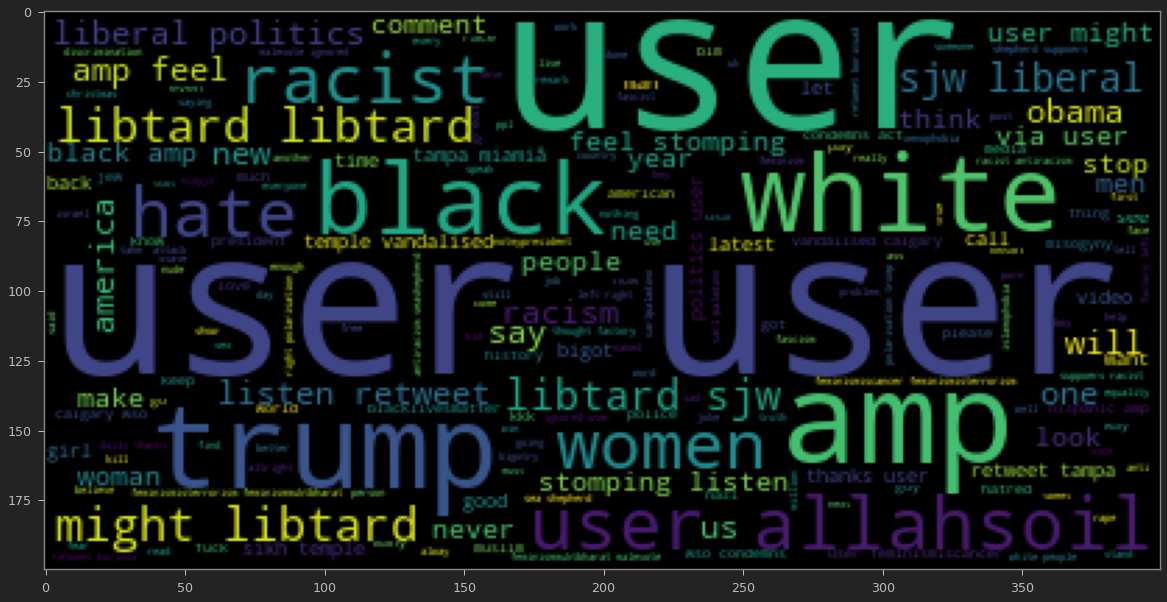

In [ ]:
#Plotting wordcloud for negative comments
#negative comments as a single string
negative_tweets = negative['tweet'].tolist()
negative_comments = " ".join(negative_tweets)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_comments))

# Removing Punctuation

In [ ]:
import string


In [ ]:
test = "$My n@me !s O.LI.S<<A@34^&&8"
new_test= [char for char in test if char not in string.punctuation]
new_test = "".join(new_test)
new_test

'My nme s OLISA348'

#Remove Stop Words

In [ ]:
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#View the stopwords
stopwords.words("english")

In [ ]:
Test_punc_removed_join = 'I enjoy coding, programming and Artificial intelligence'
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
Test_punc_removed_join_clean

['enjoy', 'coding,', 'programming', 'Artificial', 'intelligence']

# Word Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#Test it out

sample = ["My name is Olisa", "Nice to meet you, Olisa", "Funke likes olisa", "Why are we here"]

#Instantiate the class
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(sample)

In [ ]:
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['are',
 'funke',
 'here',
 'is',
 'likes',
 'meet',
 'my',
 'name',
 'nice',
 'olisa',
 'to',
 'we',
 'why',
 'you']

In [ ]:
X.toarray()

array([[0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]])

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#Data Cleaning Pipeline

In [ ]:
def data_cleaning(message):
  #Remove punctuation
  #Turn to string from list
  #Remove stopwords
  message_no_punc = [char for char in message if char not in string.punctuation]
  clean_message_as_string= "".join(message_no_punc)
  message_no_stopwords = [word for word in clean_message_as_string.split() if word.lower() not in stopwords.words("english")]
  return message_no_stopwords


In [ ]:
tweets_df_clean = tweets_df['tweet'].apply(data_cleaning)

In [ ]:
print(tweets_df_clean[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [ ]:
#Back out the vectorizer
vectorizer = CountVectorizer(analyzer=data_cleaning, dtype=np.uint8)
tweets_countvectorizer= vectorizer.fit_transform(tweets_df['tweet'])

In [ ]:
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['0',
 '0000001',
 '00027',
 '001',
 '0035',
 '00h30',
 '01',
 '0115',
 '0161',
 '019',
 '01926889917',
 '02',
 '0265',
 '0266808099',
 '02900',
 '03',
 '030916',
 '03111880779',
 '032',
 '033',
 '0345',
 '039',
 '04',
 '045',
 '04k',
 '05',
 '0506823156',
 '06',
 '06052016',
 '0606',
 '060616',
 '0608',
 '0608wed',
 '0609',
 '0610',
 '061116',
 '0612',
 '0613',
 '0616',
 '0617',
 '0618',
 '0618saturday7monthscouple',
 '0618â\x99¡',
 '0620',
 '06202016',
 '0622',
 '0624',
 '06Â',
 '07',
 '07000',
 '07040',
 '07044',
 '07150',
 '07190',
 '07400',
 '07468',
 '07500',
 '076',
 '07788427999',
 '07800',
 '07840',
 '07850',
 '07870',
 '07900',
 '07930',
 '07950',
 '08',
 '0806',
 '080616',
 '088b',
 '08â\x80¦',
 '09',
 '09062016',
 '0933m',
 '09600',
 '0k',
 '0shares',
 '0tolerancemovie',
 '0ð\x9f\x98¥â\x98¹ï¸\x8f',
 '1',
 '10',
 '100',
 '1000',
 '100000',
 '10003',
 '10007',
 '1000gifts',
 '1000th',
 '1000x',
 '1000yr',
 '1000â\x82¬',
 '1001',
 '1001000s',
 '10014',
 '10021',
 '10025',
 '10

In [ ]:
print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
tweets_countvectorizer.shape

(31962, 47386)

In [ ]:
X  = pd.DataFrame(data= tweets_countvectorizer.toarray())
X.shape

(31962, 47386)

In [ ]:
y= tweets_df['label']

In [ ]:
y.shape

(31962,)

#Training The Model 
We are using a **Naïeve Bayes** Classifier 


In [ ]:
#split the data for cross validation 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
#Import and instantiate the classifier 
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()

#Fit data to train the model
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
#Make the predictions
y_predict_test = NB_classifier.predict(X_test)

# Visualizing Results

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


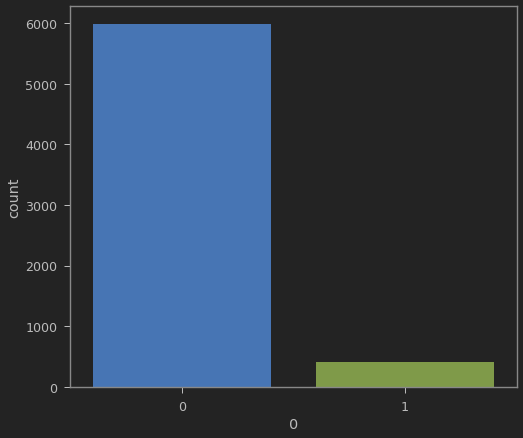

In [ ]:
y_predictors = pd.DataFrame(y_predict_test)
sns.countplot(y_predictors[0], label = "Count")

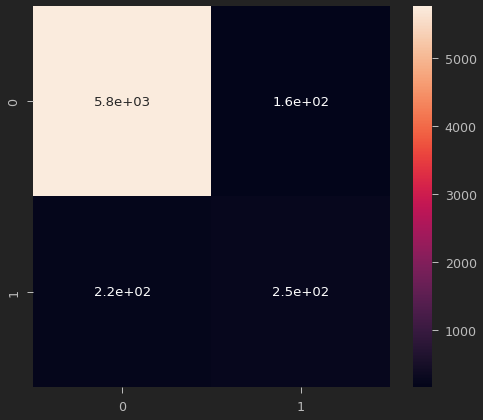

In [ ]:
#Evaluate model using CONFUSION Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5922
           1       0.61      0.54      0.57       471

    accuracy                           0.94      6393
   macro avg       0.79      0.75      0.77      6393
weighted avg       0.94      0.94      0.94      6393



In [ ]:
new_tweet = "The Samsung projector 'looks' cool but that bitch got a 5watt speaker and 1080 resolution for $900. Pass."
#clean the tweet
new_tweet= data_cleaning(new_tweet)

In [ ]:
#vectorize the tweet
#Back out the vectorizer
vectorizer = CountVectorizer(analyzer=data_cleaning, dtype=np.uint8)
tweets_countvectorizer= vectorizer.fit_transform(new_tweet)

In [ ]:
tweets_countvectorizer.toarray()

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
NB_classifier.predict(tweets_countvectorizer)

ValueError: ignored